In [12]:
import requests
import pandas as pd

# List to hold DataFrames
dfs = []

for name in ['a', 'i', 'p']:
    # URL of the data file
    url = f"https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/pentad/pent_h22-{name}0-700m.dat"

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # If successful, write the content to a file
        with open(f"pent_h22-{name}0-700m.dat", "wb") as f:
            f.write(response.content)
        print(f"File for {name} downloaded successfully.")
    else:
        print(f"Failed to download the file for {name}.")

    # Load the data into a DataFrame
    data = pd.read_csv(f"pent_h22-{name}0-700m.dat", delim_whitespace=True)
    
    # Append the DataFrame to the list
    dfs.append(data.iloc[:,0:2])

# Merge the DataFrames along the rows based on the "YEAR" column
merged_df = dfs[0]  # Initialize merged_df with the first DataFrame
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on="YEAR", how="outer")

# Display the merged DataFrame
merged_df


File for a downloaded successfully.
File for i downloaded successfully.
File for p downloaded successfully.


,YEAR,AO,IO,PO
0,1957.5,-2.601,-1.191,-2.506
1,1958.5,-2.404,-1.238,-1.259
2,1959.5,-2.550,-1.415,-1.826
3,1960.5,-1.656,-1.068,-0.672
4,1961.5,-2.049,-0.715,0.047
...,...,...,...,...
60,2017.5,5.750,3.367,5.775
61,2018.5,6.623,3.095,6.011
62,2019.5,7.252,2.984,6.509
63,2020.5,7.593,3.091,6.602


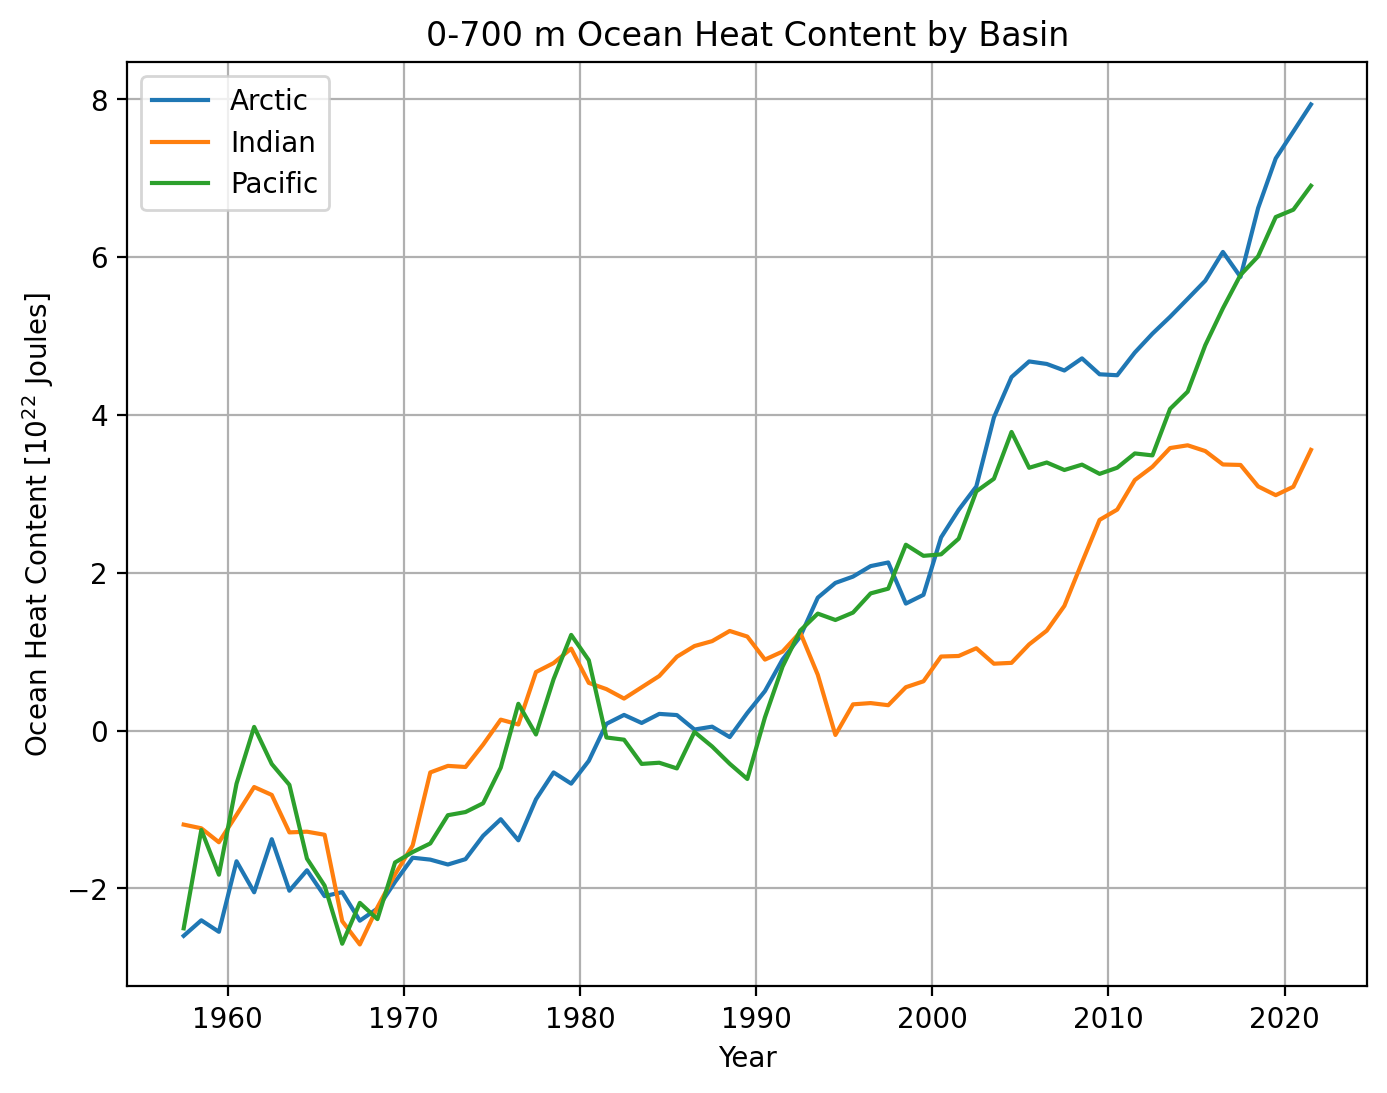

In [32]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(merged_df['YEAR'], merged_df['AO'], label='Arctic')
plt.plot(merged_df['YEAR'], merged_df['IO'], label='Indian')
plt.plot(merged_df['YEAR'], merged_df['PO'], label='Pacific')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content [$10^{22}$ Joules]')
plt.title('0-700 m Ocean Heat Content by Basin')
plt.grid()
plt.legend()

# Show plot
plt.show()

In [46]:
import requests
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# List to hold DataFrames
dfs_700m = []
dfs_2000m = []

depth_ranges = ['700m', '2000m']

for depth_range in depth_ranges:
    for name in ['a', 'i', 'p', 'w']:
        # URL of the data file
        url = f"https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/pentad/pent_h22-{name}0-{depth_range}.dat"

        # Send a GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # If successful, write the content to a file
            with open(f"pent_h22-{name}0-{depth_range}.dat", "wb") as f:
                f.write(response.content)
            print(f"File for {name} at {depth_range} downloaded successfully.")
        else:
            print(f"Failed to download the file for {name} at {depth_range}.")

        # Load the data into a DataFrame
        data = pd.read_csv(f"pent_h22-{name}0-{depth_range}.dat", delim_whitespace=True)
        
        # Append the DataFrame to the list
        if depth_range == '700m':
            dfs_700m.append(data.iloc[:, 0:2])
        elif depth_range == '2000m':
            dfs_2000m.append(data.iloc[:, 0:2])

# Merge the DataFrames along the rows based on the "YEAR" column
merged_df_700m = dfs_700m[0]  # Initialize merged_df with the first DataFrame
for df in dfs_700m[1:]:
    merged_df_700m = pd.merge(merged_df_700m, df, on="YEAR", how="outer")

merged_df_2000m = dfs_2000m[0]  # Initialize merged_df with the first DataFrame
for df in dfs_2000m[1:]:
    merged_df_2000m = pd.merge(merged_df_2000m, df, on="YEAR", how="outer")

# Plotly plot
fig = go.Figure()

# Add traces for 700m depth range
fig.add_trace(go.Scatter(x=merged_df_700m['YEAR'], y=merged_df_700m['AO'], mode='lines', name='Arctic (0-700m)', line=dict(color='red')))
fig.add_trace(go.Scatter(x=merged_df_700m['YEAR'], y=merged_df_700m['IO'], mode='lines', name='Indian (0-700m)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=merged_df_700m['YEAR'], y=merged_df_700m['PO'], mode='lines', name='Pacific (0-700m)', line=dict(color='green')))
fig.add_trace(go.Scatter(x=merged_df_700m['YEAR'], y=merged_df_700m['WO'], mode='lines', name='Global (0-700m)', line=dict(color='black')))

# Add traces for 2000m depth range
fig.add_trace(go.Scatter(x=merged_df_2000m['YEAR'], y=merged_df_2000m['AO'], mode='lines', name='Arctic (0-2000m)', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=merged_df_2000m['YEAR'], y=merged_df_2000m['IO'], mode='lines', name='Indian (0-2000m)', line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=merged_df_2000m['YEAR'], y=merged_df_2000m['PO'], mode='lines', name='Pacific (0-2000m)', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=merged_df_2000m['YEAR'], y=merged_df_2000m['WO'], mode='lines', name='Global (0-2000m)', line=dict(color='black', dash='dash')))

# Create dropdown menu for selecting depth range
depth_dropdown = [
    dict(label="700m",
         method="update",
         args=[{"visible": [True, True, True, True, False, False, False, False]},
               {"title": "Ocean Heat Content by Basin - 0-700m"}]),
    dict(label="2000m",
         method="update",
         args=[{"visible": [False, False, False, False, True, True, True, True]},
               {"title": "Ocean Heat Content by Basin - 0-2000m"}])
]

# Update layout
fig.update_layout(title='Ocean Heat Content by Basin',
                  xaxis_title='Year',
                  yaxis_title='Ocean Heat Content (10<sup>22</sup> Joules)',
                  yaxis=dict(tickformat="latex"),
                  updatemenus=[
                      dict(buttons=depth_dropdown,
                           direction="down",
                           pad={"r": 10, "t": 10},
                           showactive=True,
                           x=0.1,
                           xanchor="left",
                           y=1.1,
                           yanchor="top"
                      )
                  ])

# Save plot as HTML file
pio.write_html(fig, 'heat_plot.html')

File for a at 700m downloaded successfully.
File for i at 700m downloaded successfully.
File for p at 700m downloaded successfully.
File for w at 700m downloaded successfully.
File for a at 2000m downloaded successfully.
File for i at 2000m downloaded successfully.
File for p at 2000m downloaded successfully.
File for w at 2000m downloaded successfully.


In [48]:
import requests
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# List to hold DataFrames
dfs_100m = []
dfs_2000m = []

depth_ranges = ['100m', '2000m']

for depth_range in depth_ranges:
    for name in ['a', 'i', 'p', 'w']:
        # URL of the data file
        url = f"https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/SAL_ANOM/DATA/basin/pentad_ms/pent_S-pss-{name}0-{depth_range}.dat"

        # Send a GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # If successful, write the content to a file
            with open(f"pent_h22-{name}0-{depth_range}.dat", "wb") as f:
                f.write(response.content)
            print(f"File for {name} at {depth_range} downloaded successfully.")
        else:
            print(f"Failed to download the file for {name} at {depth_range}.")

        # Load the data into a DataFrame
        data = pd.read_csv(f"pent_h22-{name}0-{depth_range}.dat", delim_whitespace=True)
        
        # Append the DataFrame to the list
        if depth_range == '100m':
            dfs_100m.append(data.iloc[:, 0:2])
        elif depth_range == '2000m':
            dfs_2000m.append(data.iloc[:, 0:2])

# Merge the DataFrames along the rows based on the "YEAR" column
merged_df_100m = dfs_100m[0]  # Initialize merged_df with the first DataFrame
for df in dfs_100m[1:]:
    merged_df_100m = pd.merge(merged_df_100m, df, on="YEAR", how="outer")

merged_df_2000m = dfs_2000m[0]  # Initialize merged_df with the first DataFrame
for df in dfs_2000m[1:]:
    merged_df_2000m = pd.merge(merged_df_2000m, df, on="YEAR", how="outer")

# Plotly plot
fig = go.Figure()

# Add traces for 100m depth range
fig.add_trace(go.Scatter(x=merged_df_100m['YEAR'], y=merged_df_100m['AO'], mode='lines', name='Arctic (0-100m)', line=dict(color='red')))
fig.add_trace(go.Scatter(x=merged_df_100m['YEAR'], y=merged_df_100m['IO'], mode='lines', name='Indian (0-100m)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=merged_df_100m['YEAR'], y=merged_df_100m['PO'], mode='lines', name='Pacific (0-100m)', line=dict(color='green')))
fig.add_trace(go.Scatter(x=merged_df_100m['YEAR'], y=merged_df_100m['WO'], mode='lines', name='Global (0-100m)', line=dict(color='black')))

# Add traces for 2000m depth range
fig.add_trace(go.Scatter(x=merged_df_2000m['YEAR'], y=merged_df_2000m['AO'], mode='lines', name='Arctic (0-2000m)', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=merged_df_2000m['YEAR'], y=merged_df_2000m['IO'], mode='lines', name='Indian (0-2000m)', line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=merged_df_2000m['YEAR'], y=merged_df_2000m['PO'], mode='lines', name='Pacific (0-2000m)', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=merged_df_2000m['YEAR'], y=merged_df_2000m['WO'], mode='lines', name='Global (0-2000m)', line=dict(color='black', dash='dash')))

# Create dropdown menu for selecting depth range
depth_dropdown = [
    dict(label="100m",
         method="update",
         args=[{"visible": [True, True, True, True, False, False, False, False]},
               {"title": "Salinity by Basin - 0-100m"}]),
    dict(label="2000m",
         method="update",
         args=[{"visible": [False, False, False, False, True, True, True, True]},
               {"title": "Salinity by Basin - 0-2000m"}])
]

# Update layout
fig.update_layout(title='Salinity by Basin',
                  xaxis_title='Year',
                  yaxis_title='Salinity (pss)',
                  yaxis=dict(tickformat="latex"),
                  updatemenus=[
                      dict(buttons=depth_dropdown,
                           direction="down",
                           pad={"r": 10, "t": 10},
                           showactive=True,
                           x=0.1,
                           xanchor="left",
                           y=1.1,
                           yanchor="top"
                      )
                  ])

# Save plot as HTML file
pio.write_html(fig, 'salinity_plot.html')

File for a at 100m downloaded successfully.
File for i at 100m downloaded successfully.
File for p at 100m downloaded successfully.
File for w at 100m downloaded successfully.
File for a at 2000m downloaded successfully.
File for i at 2000m downloaded successfully.
File for p at 2000m downloaded successfully.
File for w at 2000m downloaded successfully.
